In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

In [5]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from IPython.display import Image

import seaborn as sns
import matplotlib.pylab as plt
sns.set_theme(style='whitegrid', font_scale=1.5)
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

In [7]:
data = pd.read_csv('2022.csv', encoding='CP949')
data.rename(columns={ '가구주_성별코드':'성별', '가구주_교육정도_학력코드':'학력', '가구주_직업대분류코드':'직업', '가구주_만연령':'연령',
       '자산_금융자산_저축금액':'저축', '자산_실물자산_부동산금액':'부동산', '부채_금융부채_담보대출금액':'담보대출', '부채_금융부채_신용대출금액':'신용대출',
       '경상소득(보완)':'소득', '지출_소비지출_식료품(외식비포함)':'식료지출', '지출_소비지출_주거비':'주거지출', '지출_소비지출_교육비(보육료포함)':'교육지출',
       '지출_비소비지출_세금(보완)':'세금'},inplace=True)
data['학력'] = data['학력'].astype('category')
data['직업'].fillna('기타',inplace=True)

In [19]:
#int_columns = [ '저축', '부동산', '담보대출', '신용대출', '소득', '식료지출', '주거지출', '교육지출', '세금']
int_columns = ['연령','저축', '부동산', '담보대출', '신용대출', '소득', '식료지출', '주거지출', '교육지출', '세금']


In [23]:
data_log=data.copy()
data_log['소득'] = np.log1p(data_log['소득'])

In [24]:
data_log.describe()

성별          가구원수            연령            저축           부동산  \
count  1.795400e+04  1.795400e+04  1.795400e+04  1.795400e+04  1.795400e+04   
mean   2.532847e-16 -1.519708e-16 -2.532847e-17 -1.583029e-17  3.166059e-17   
std    1.000028e+00  1.000028e+00  1.000028e+00  1.000028e+00  1.000028e+00   
min   -6.234269e-01 -1.120841e+00 -2.661444e+00 -4.286996e-01 -5.381431e-01   
25%   -6.234269e-01 -1.120841e+00 -7.539532e-01 -3.902349e-01 -5.381431e-01   
50%   -6.234269e-01 -2.998056e-01  3.535335e-02 -2.523211e-01 -3.087634e-01   
75%    1.604037e+00  5.212301e-01  7.588843e-01  3.669536e-02  1.069873e-01   
max    1.604037e+00  5.447445e+00  2.995253e+00  4.875332e+01  2.426353e+01   

               담보대출          신용대출            소득          식료지출          주거지출  \
count  1.795400e+04  1.795400e+04  17954.000000  1.795400e+04  1.795400e+04   
mean  -2.057938e-17 -1.741332e-17     -0.357882 -1.266424e-17  3.720119e-17   
std    1.000028e+00  1.000028e+00      0.870366  1.000028e+00  1.000028e+00   
min   -3.259019e-01 -2.525778e-01     -3.853333 -1.432145e+00 -1.149127e+00   
25%   -3.259019e-01 -2.525778e-01     -0.964527 -7.421153e-01 -5.169610e-01   
50%   -3.259019e-01 -2.525778e-01     -0.291054 -2.245930e-01 -2.359985e-01   
75%   -6.962648e-02 -2.525778e-01      0.270105  6.379442e-01  2.258335e-01   
max    4.163166e+01  4.145560e+01      3.245610  8.918302e+00  4.520968e+01   

               교육지출            세금  
count  1.795400e+04  1.795400e+04  
mean  -2.216241e-17  7.915147e-18  
std    1.000028e+00  1.000028e+00  
min   -4.071464e-01 -2.564922e-01  
25%   -4.071464e-01 -2.440511e-01  
50%   -4.071464e-01 -2.059959e-01  
75%   -1.987851e-01 -7.865720e-02  
max    1.660902e+01  4.884573e+01

In [25]:
int_columns = [ '성별','가구원수','연령','저축', '부동산', '담보대출', '신용대출', '소득', '식료지출', '주거지출', '교육지출', '세금']

scaler = StandardScaler()
data[int_columns] = scaler.fit_transform(data[int_columns])

In [26]:
data_log.describe()

성별          가구원수            연령            저축           부동산  \
count  1.795400e+04  1.795400e+04  1.795400e+04  1.795400e+04  1.795400e+04   
mean   2.532847e-16 -1.519708e-16 -2.532847e-17 -1.583029e-17  3.166059e-17   
std    1.000028e+00  1.000028e+00  1.000028e+00  1.000028e+00  1.000028e+00   
min   -6.234269e-01 -1.120841e+00 -2.661444e+00 -4.286996e-01 -5.381431e-01   
25%   -6.234269e-01 -1.120841e+00 -7.539532e-01 -3.902349e-01 -5.381431e-01   
50%   -6.234269e-01 -2.998056e-01  3.535335e-02 -2.523211e-01 -3.087634e-01   
75%    1.604037e+00  5.212301e-01  7.588843e-01  3.669536e-02  1.069873e-01   
max    1.604037e+00  5.447445e+00  2.995253e+00  4.875332e+01  2.426353e+01   

               담보대출          신용대출            소득          식료지출          주거지출  \
count  1.795400e+04  1.795400e+04  17954.000000  1.795400e+04  1.795400e+04   
mean  -2.057938e-17 -1.741332e-17     -0.357882 -1.266424e-17  3.720119e-17   
std    1.000028e+00  1.000028e+00      0.870366  1.000028e+00  1.000028e+00   
min   -3.259019e-01 -2.525778e-01     -3.853333 -1.432145e+00 -1.149127e+00   
25%   -3.259019e-01 -2.525778e-01     -0.964527 -7.421153e-01 -5.169610e-01   
50%   -3.259019e-01 -2.525778e-01     -0.291054 -2.245930e-01 -2.359985e-01   
75%   -6.962648e-02 -2.525778e-01      0.270105  6.379442e-01  2.258335e-01   
max    4.163166e+01  4.145560e+01      3.245610  8.918302e+00  4.520968e+01   

               교육지출            세금  
count  1.795400e+04  1.795400e+04  
mean  -2.216241e-17  7.915147e-18  
std    1.000028e+00  1.000028e+00  
min   -4.071464e-01 -2.564922e-01  
25%   -4.071464e-01 -2.440511e-01  
50%   -4.071464e-01 -2.059959e-01  
75%   -1.987851e-01 -7.865720e-02  
max    1.660902e+01  4.884573e+01

In [13]:
data.describe()

성별          가구원수            연령            저축           부동산  \
count  1.795400e+04  1.795400e+04  1.795400e+04  1.795400e+04  1.795400e+04   
mean   2.532847e-16 -1.519708e-16 -2.532847e-17 -1.583029e-17  3.166059e-17   
std    1.000028e+00  1.000028e+00  1.000028e+00  1.000028e+00  1.000028e+00   
min   -6.234269e-01 -1.120841e+00 -2.661444e+00 -4.286996e-01 -5.381431e-01   
25%   -6.234269e-01 -1.120841e+00 -7.539532e-01 -3.902349e-01 -5.381431e-01   
50%   -6.234269e-01 -2.998056e-01  3.535335e-02 -2.523211e-01 -3.087634e-01   
75%    1.604037e+00  5.212301e-01  7.588843e-01  3.669536e-02  1.069873e-01   
max    1.604037e+00  5.447445e+00  2.995253e+00  4.875332e+01  2.426353e+01   

               담보대출          신용대출            소득          식료지출          주거지출  \
count  1.795400e+04  1.795400e+04  1.795400e+04  1.795400e+04  1.795400e+04   
mean  -2.057938e-17 -1.741332e-17 -3.166059e-18 -1.266424e-17  3.720119e-17   
std    1.000028e+00  1.000028e+00  1.000028e+00  1.000028e+00  1.000028e+00   
min   -3.259019e-01 -2.525778e-01 -9.787911e-01 -1.432145e+00 -1.149127e+00   
25%   -3.259019e-01 -2.525778e-01 -6.188367e-01 -7.421153e-01 -5.169610e-01   
50%   -3.259019e-01 -2.525778e-01 -2.525249e-01 -2.245930e-01 -2.359985e-01   
75%   -6.962648e-02 -2.525778e-01  3.101025e-01  6.379442e-01  2.258335e-01   
max    4.163166e+01  4.145560e+01  2.467736e+01  8.918302e+00  4.520968e+01   

               교육지출            세금  
count  1.795400e+04  1.795400e+04  
mean  -2.216241e-17  7.915147e-18  
std    1.000028e+00  1.000028e+00  
min   -4.071464e-01 -2.564922e-01  
25%   -4.071464e-01 -2.440511e-01  
50%   -4.071464e-01 -2.059959e-01  
75%   -1.987851e-01 -7.865720e-02  
max    1.660902e+01  4.884573e+01

## 원 데이터의 BOX plot

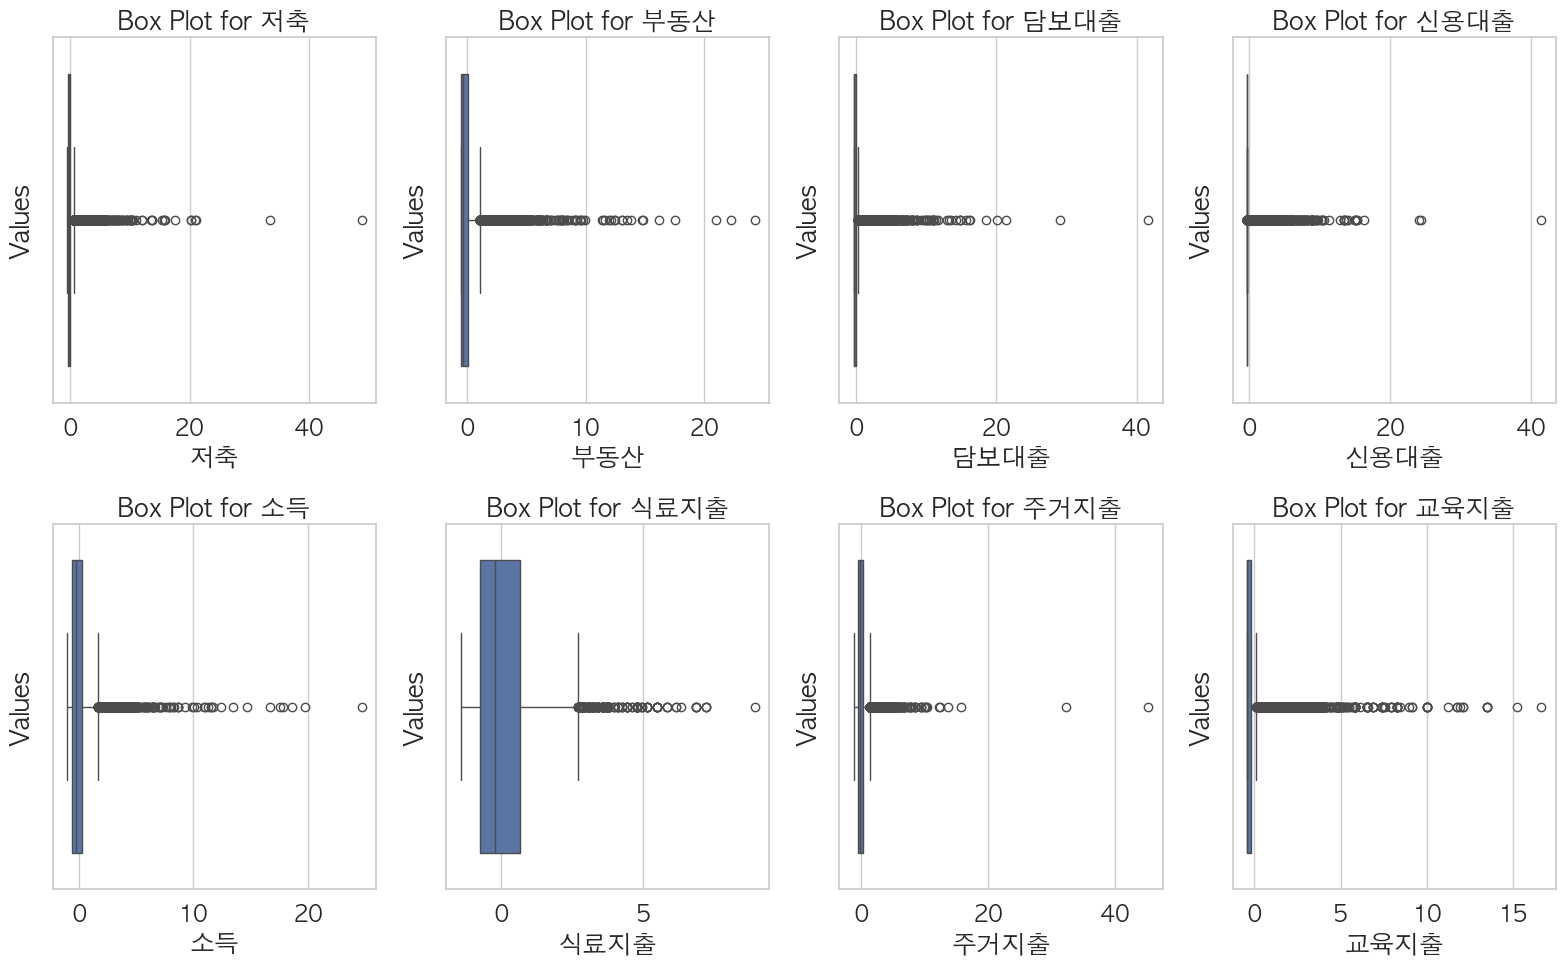

In [14]:
a = data['저축']
b = data['부동산']
c = data['담보대출']
d = data['신용대출']
e = data['소득']
f = data['식료지출']
g = data['주거지출']
h = data['교육지출']
i = data['세금']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
variables = ['저축','부동산','담보대출','신용대출','소득', '식료지출', '주거지출', '교육지출', '세금']
data_list = [a,b, c, d, e, f, g, h, i]

for ax, variable, values in zip(axes.flatten(), variables, data_list):
    sns.boxplot(x=values, ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel('Values')
    ax.set_title(f'Box Plot for {variable}')

plt.tight_layout()
plt.savefig('data')

## log화 이후의 box plot

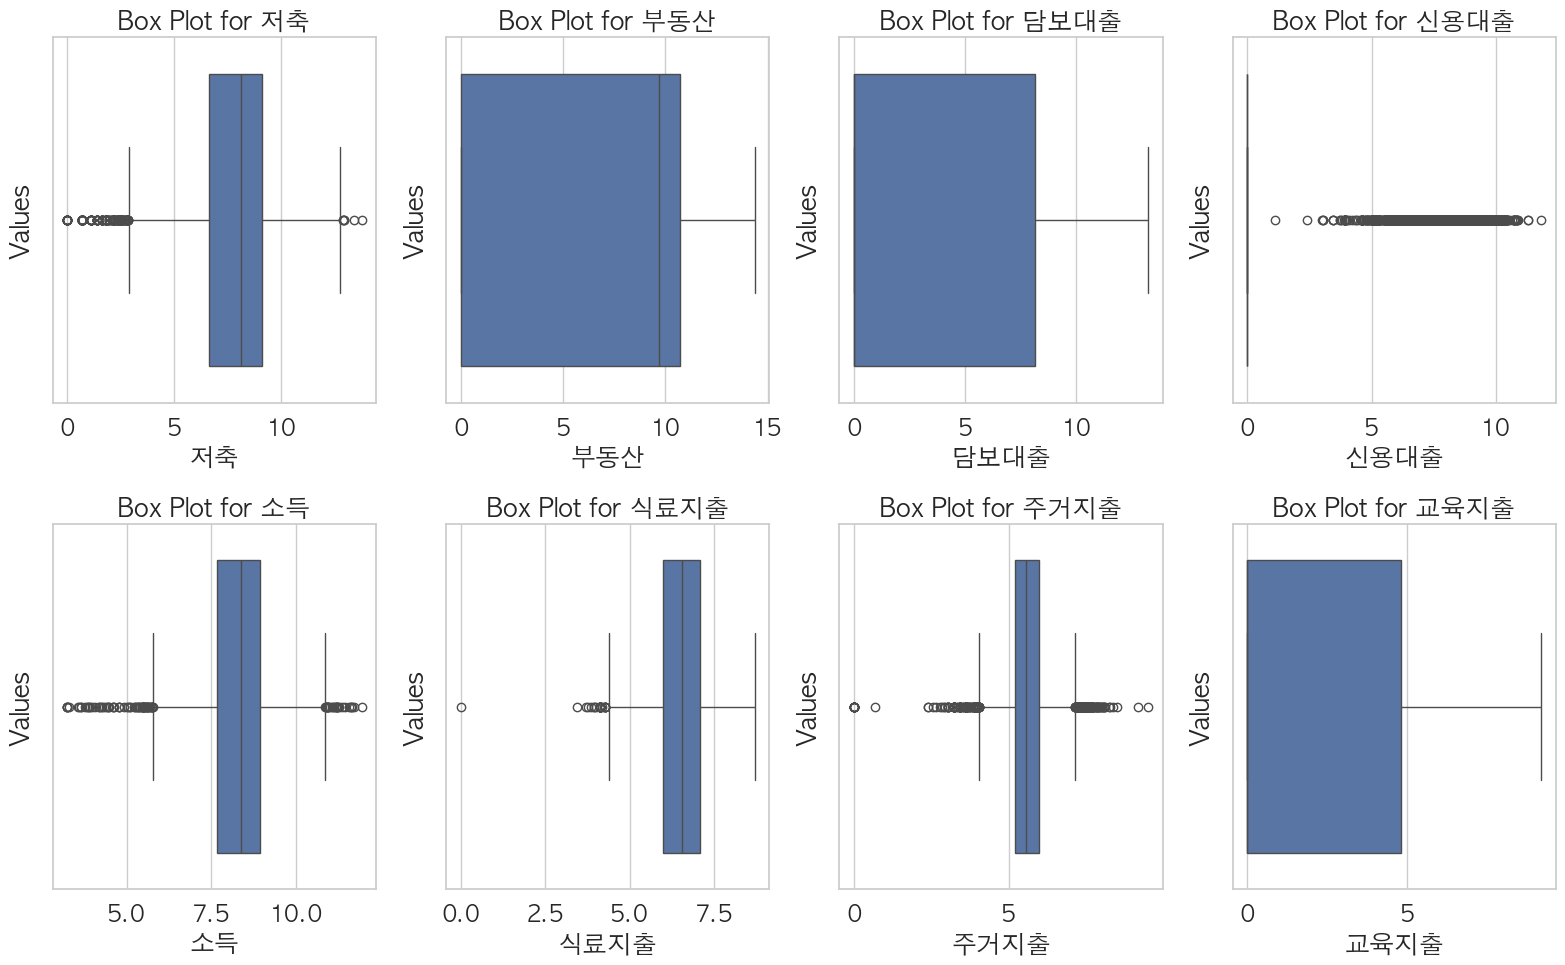

In [15]:
a = data_log['저축']
b = data_log['부동산']
c = data_log['담보대출']
d = data_log['신용대출']
e = data_log['소득']
f = data_log['식료지출']
g = data_log['주거지출']
h = data_log['교육지출']
i = data_log['세금']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
variables = ['저축','부동산','담보대출','신용대출','소득', '식료지출', '주거지출', '교육지출', '세금']
data_list = [a,b, c, d, e, f, g, h, i]

for ax, variable, values in zip(axes.flatten(), variables, data_list):
    sns.boxplot(x=values, ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel('Values')
    ax.set_title(f'Box Plot for {variable}')

plt.tight_layout()
plt.savefig('data_log')

## 원 데이터 corr
* 소득과 세금, 소득 부동산, 소득 저축, 소득 식료지출, 소득 교육지출 등이 눈에 띔

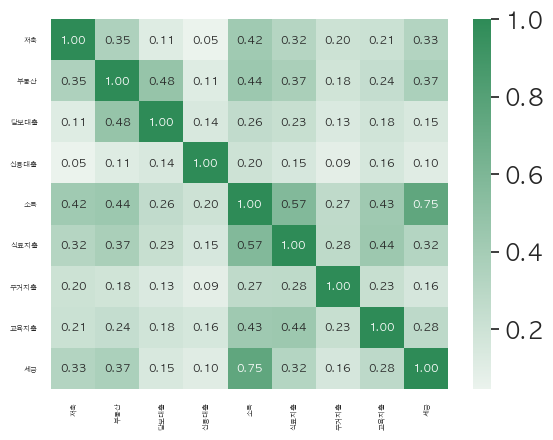

In [16]:
data_int = data[['저축','부동산','담보대출','신용대출','소득', '식료지출', '주거지출', '교육지출', '세금']]
cmap = sns.light_palette("seagreen", as_cmap = True)  
heatmap = sns.heatmap(data_int.corr(), annot=True,annot_kws={'size': 8},fmt='.2f', cmap=cmap)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=5)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=5)
plt.savefig("data_linear")

#상관관계 확인

## log data Corr
* 소득 세금은 여전히 높은 상관관계 유지, - 상관관계를 보여주는 성별, 가구원수와 식료지출(자명하다고 봄), 부동산 담보대출, 가구원수 교육지출

In [17]:
cmap = sns.light_palette("seagreen", as_cmap = True)  
heatmap = sns.heatmap(data.corr(), annot=True,annot_kws={'size': 8},fmt='.2f', cmap=cmap)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=5)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=5)
plt.savefig("data_linear")

#모든 변수에 대한 상관관계 확인

ValueError: could not convert string to float: 'G1'

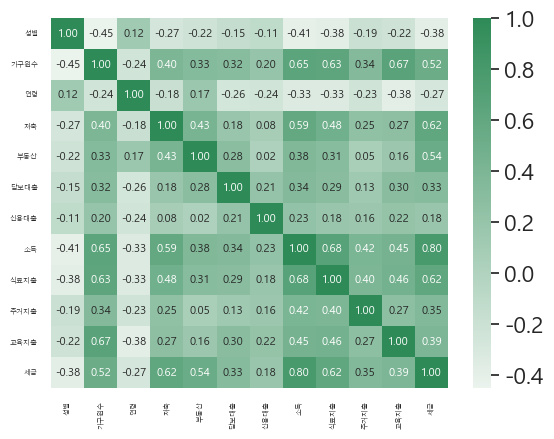

In [15]:
cmap = sns.light_palette("seagreen", as_cmap = True)  
heatmap = sns.heatmap(data_log.corr(), annot=True,annot_kws={'size': 8},fmt='.2f', cmap=cmap)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=5)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=5)
plt.savefig("data_log_linear")

#모든 변수에 대한 상관관계 확인

<function matplotlib.pyplot.show(close=None, block=None)>

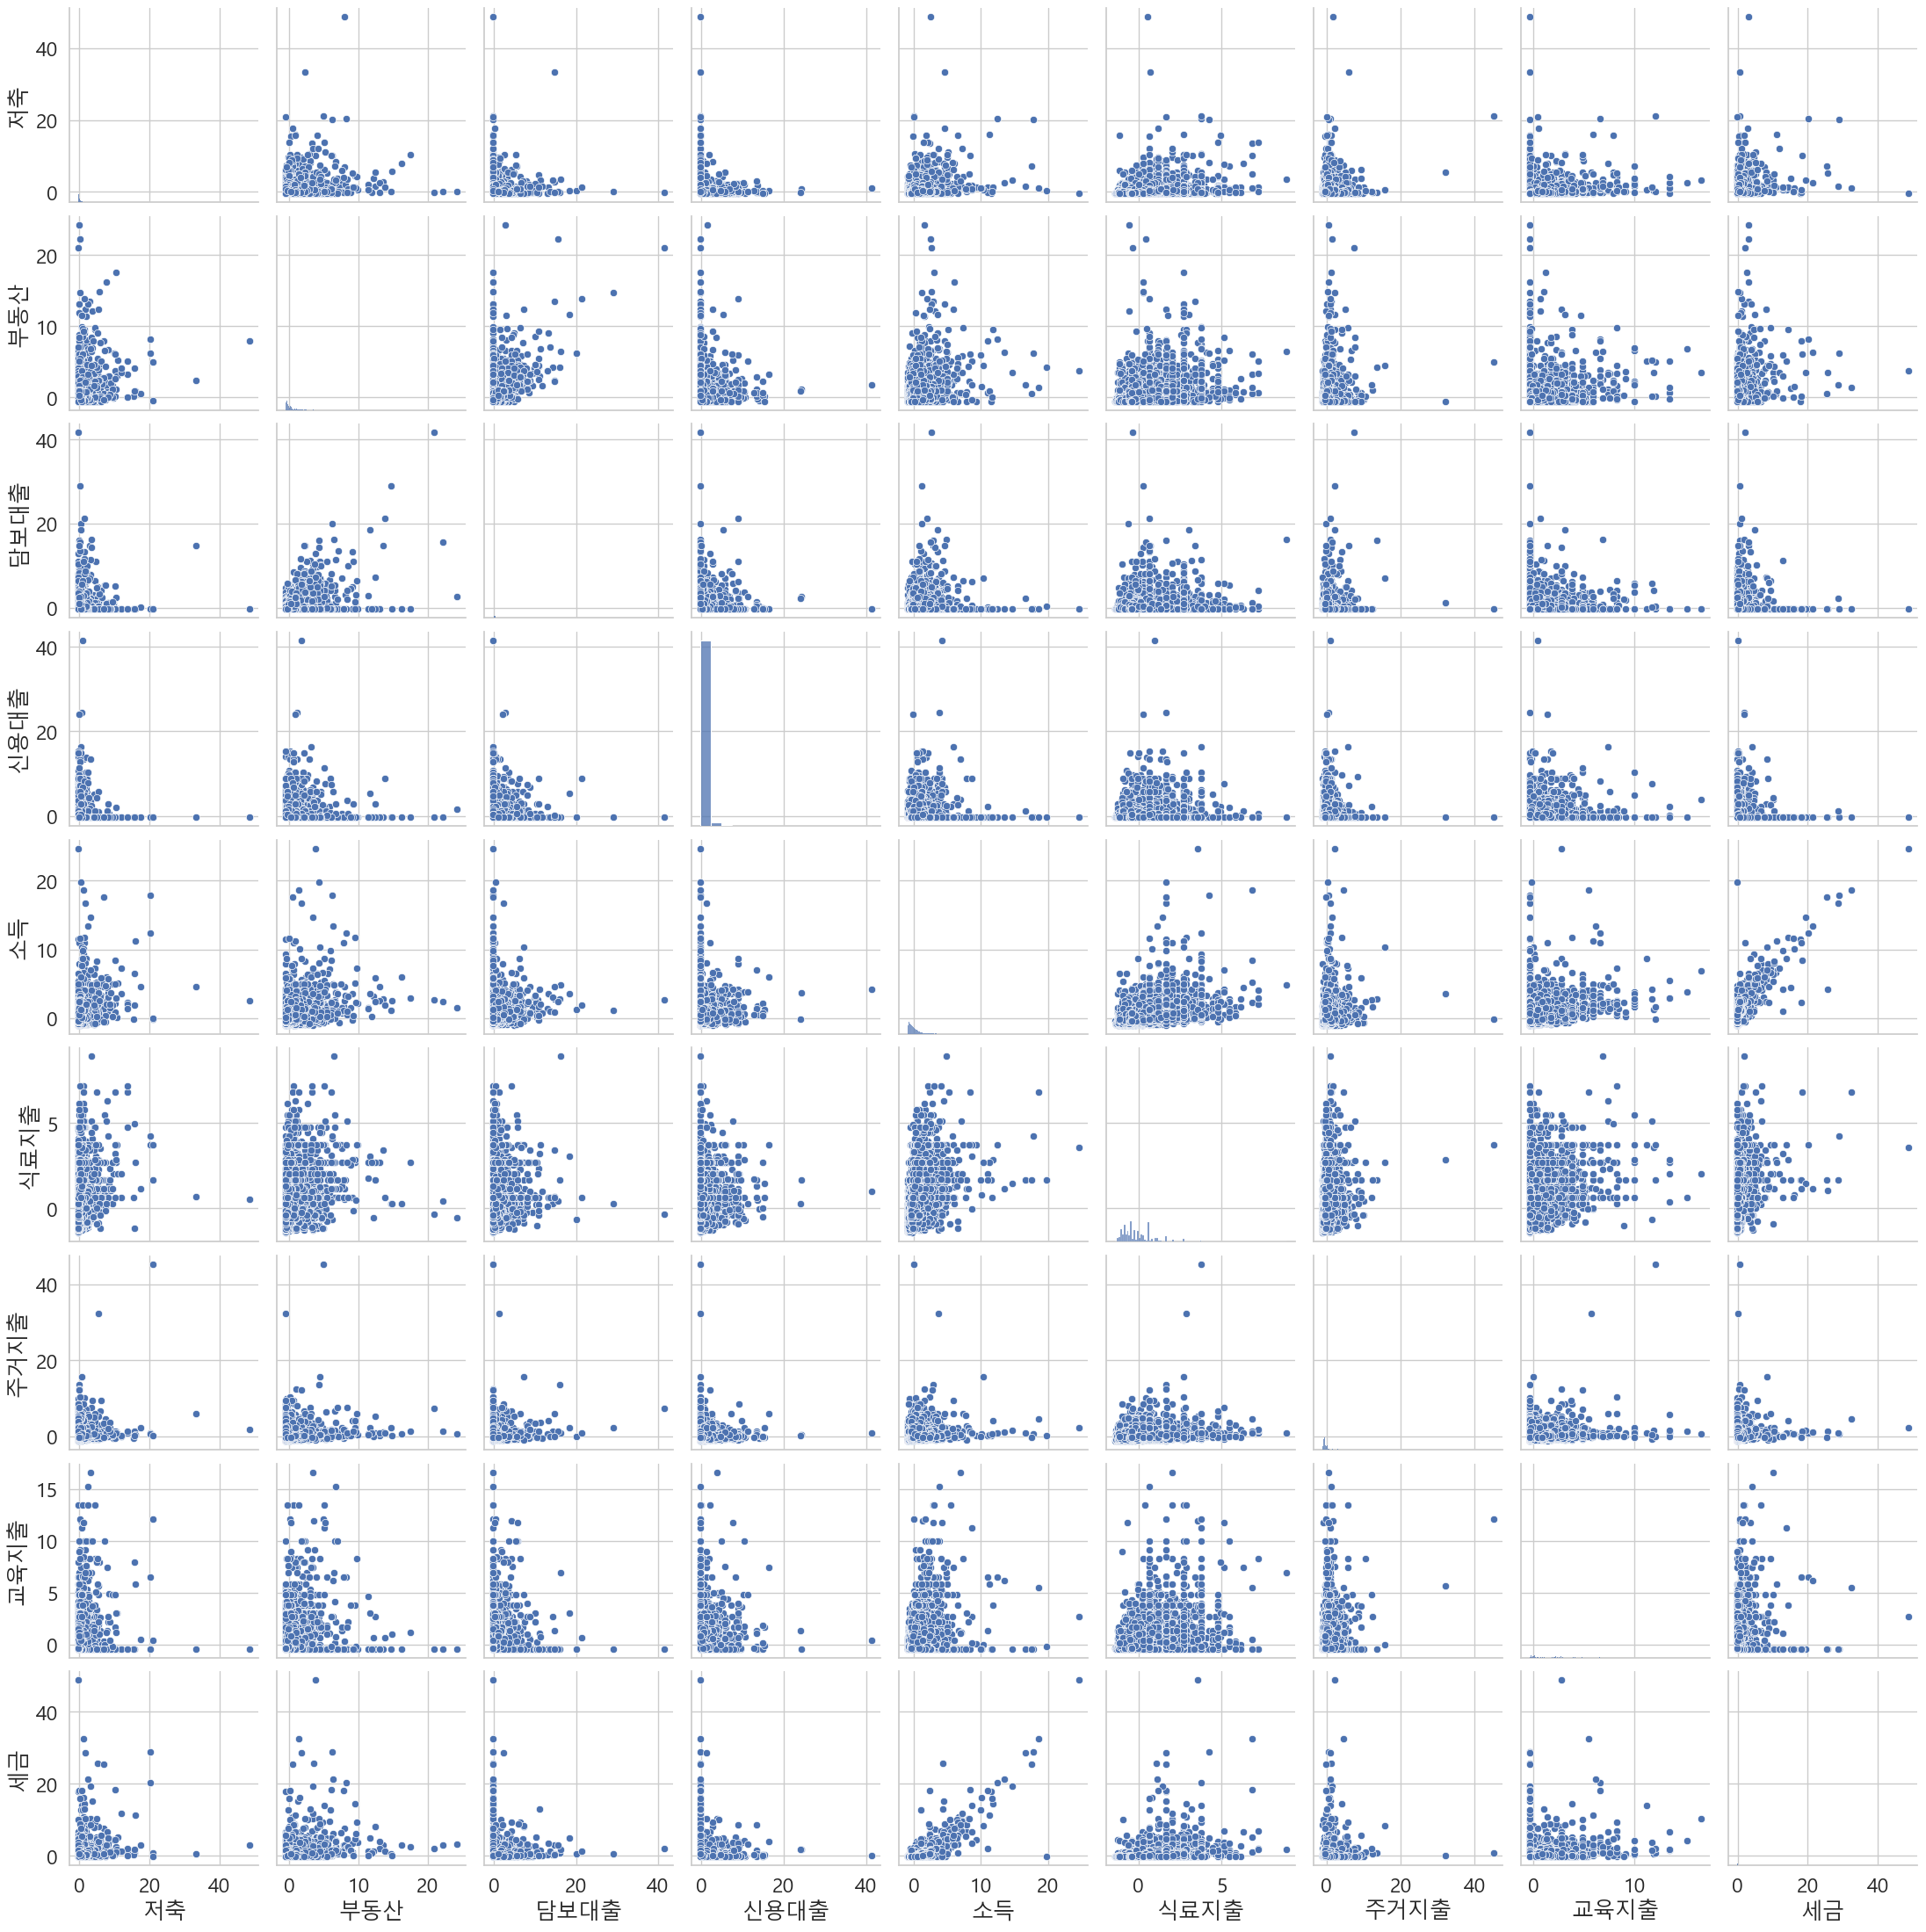

In [16]:
sns.pairplot(data_int)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

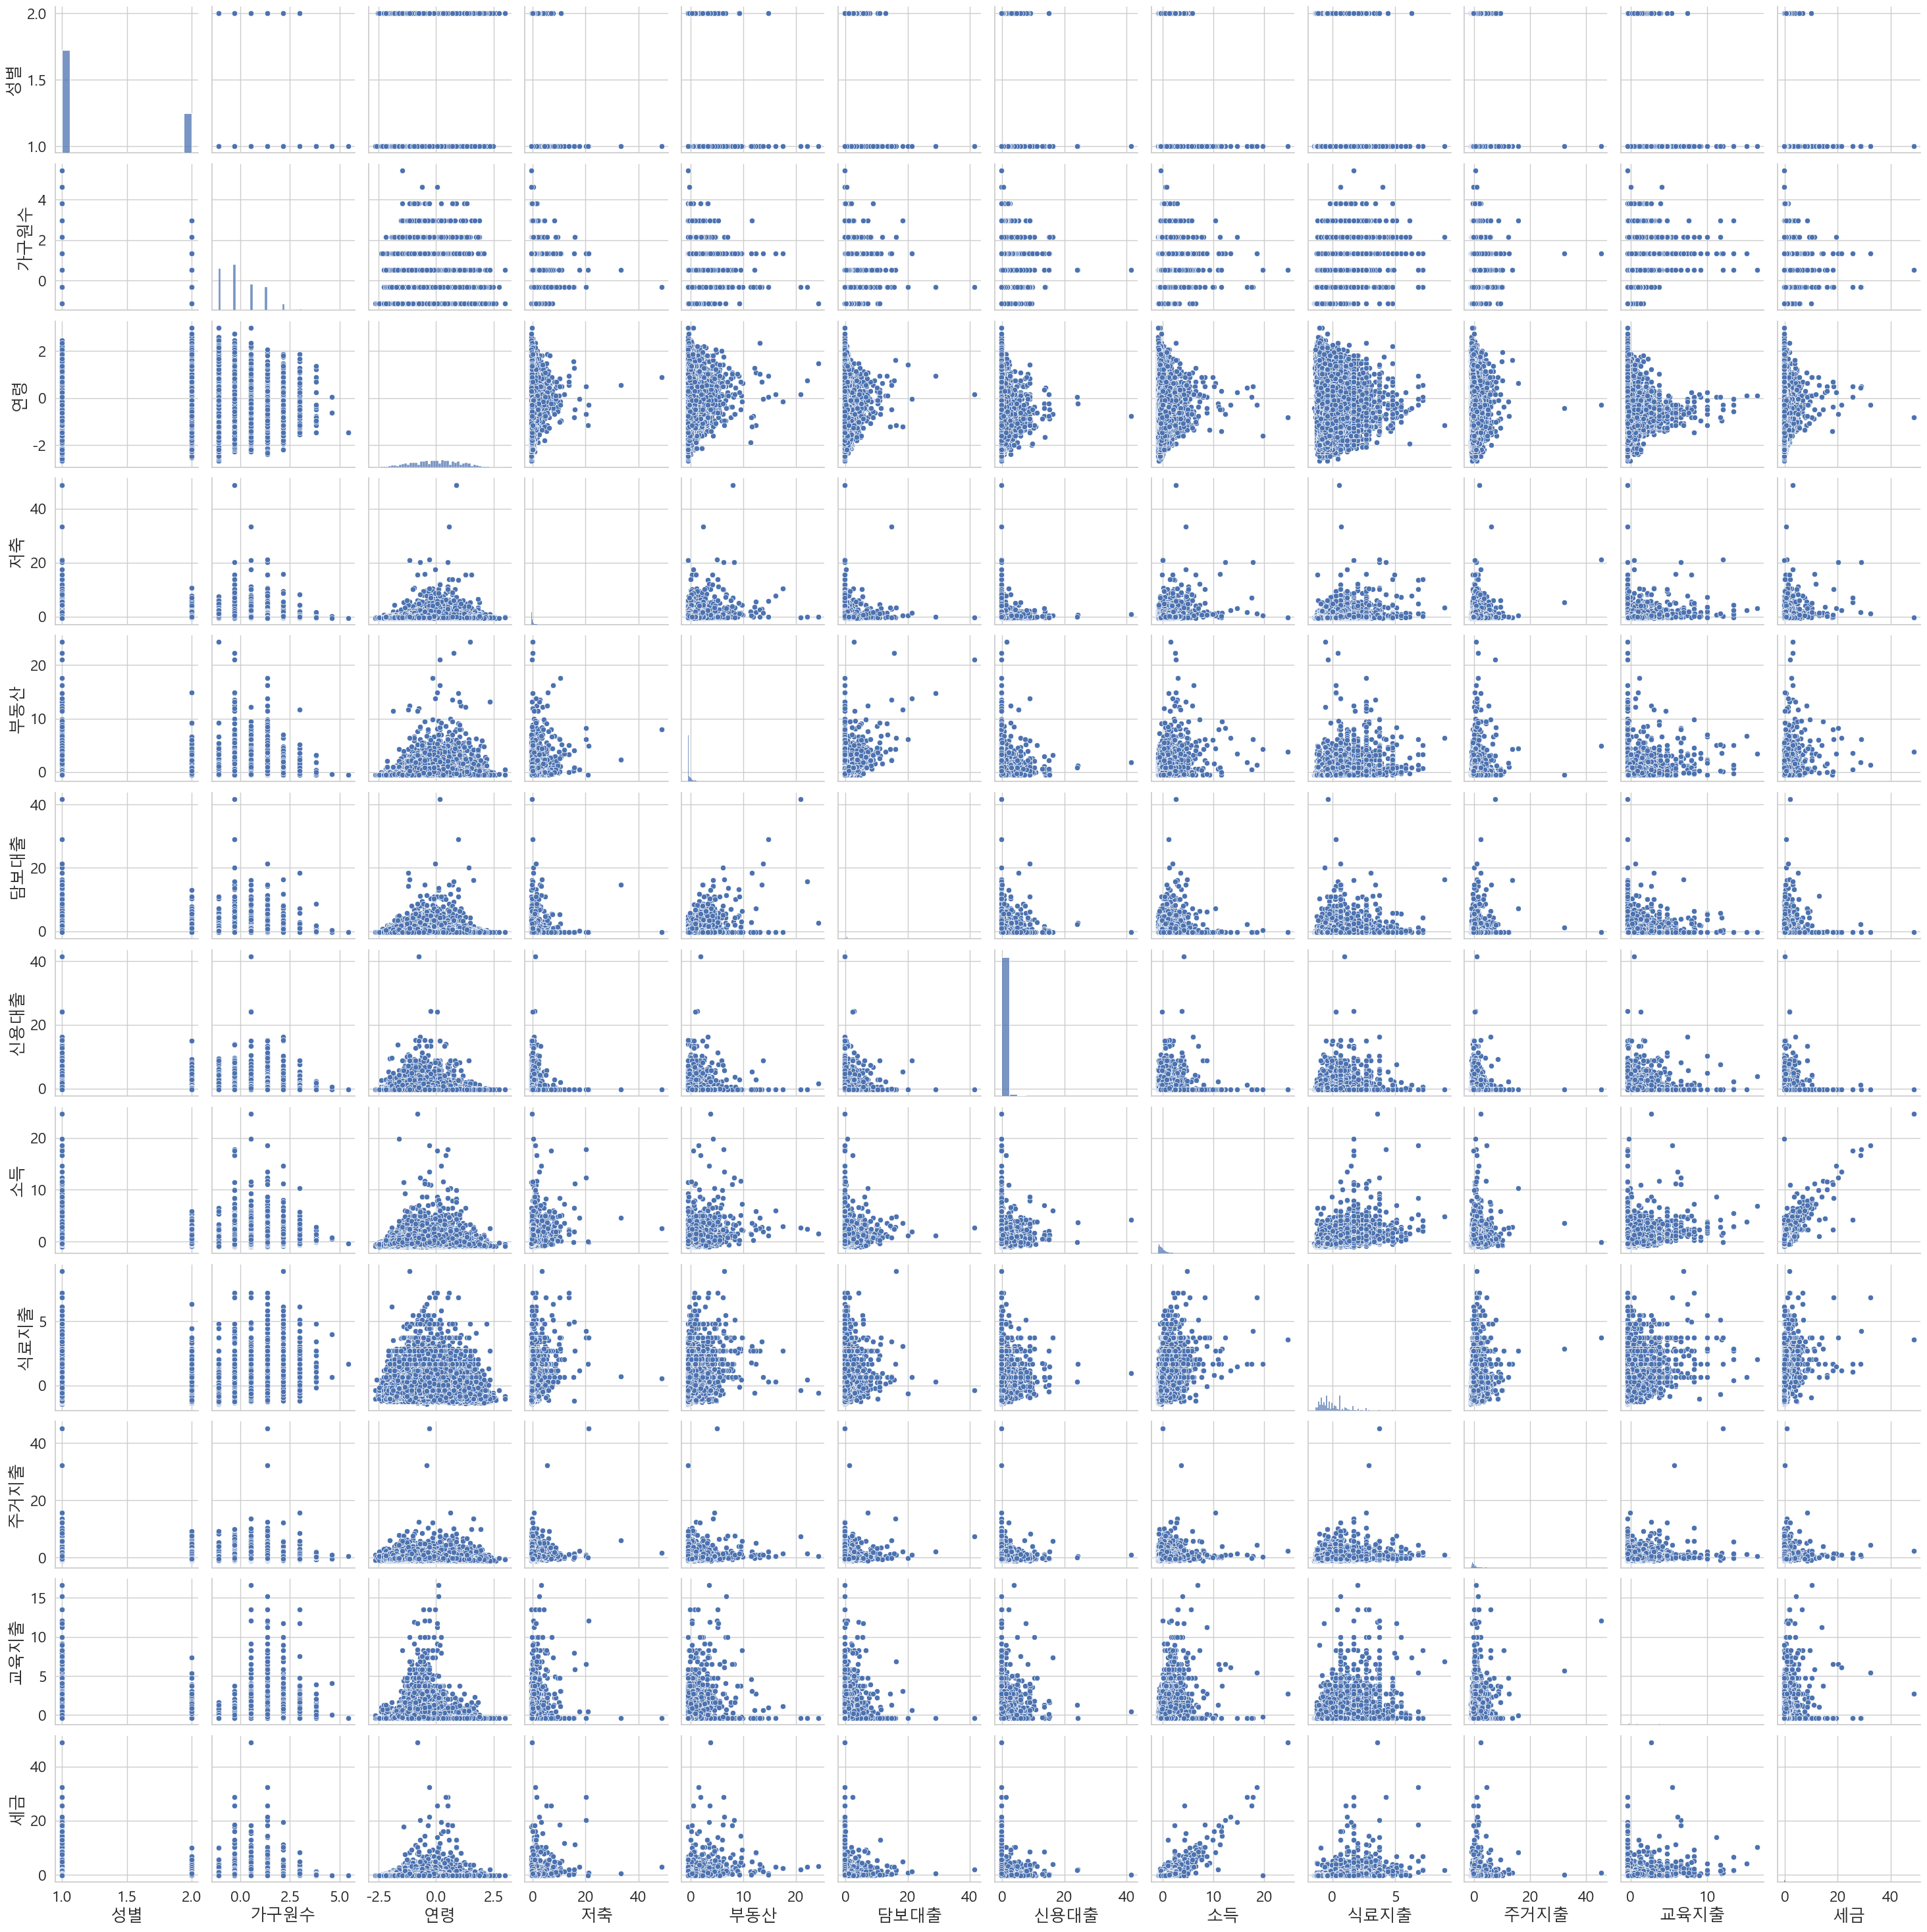

In [17]:
sns.pairplot(data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

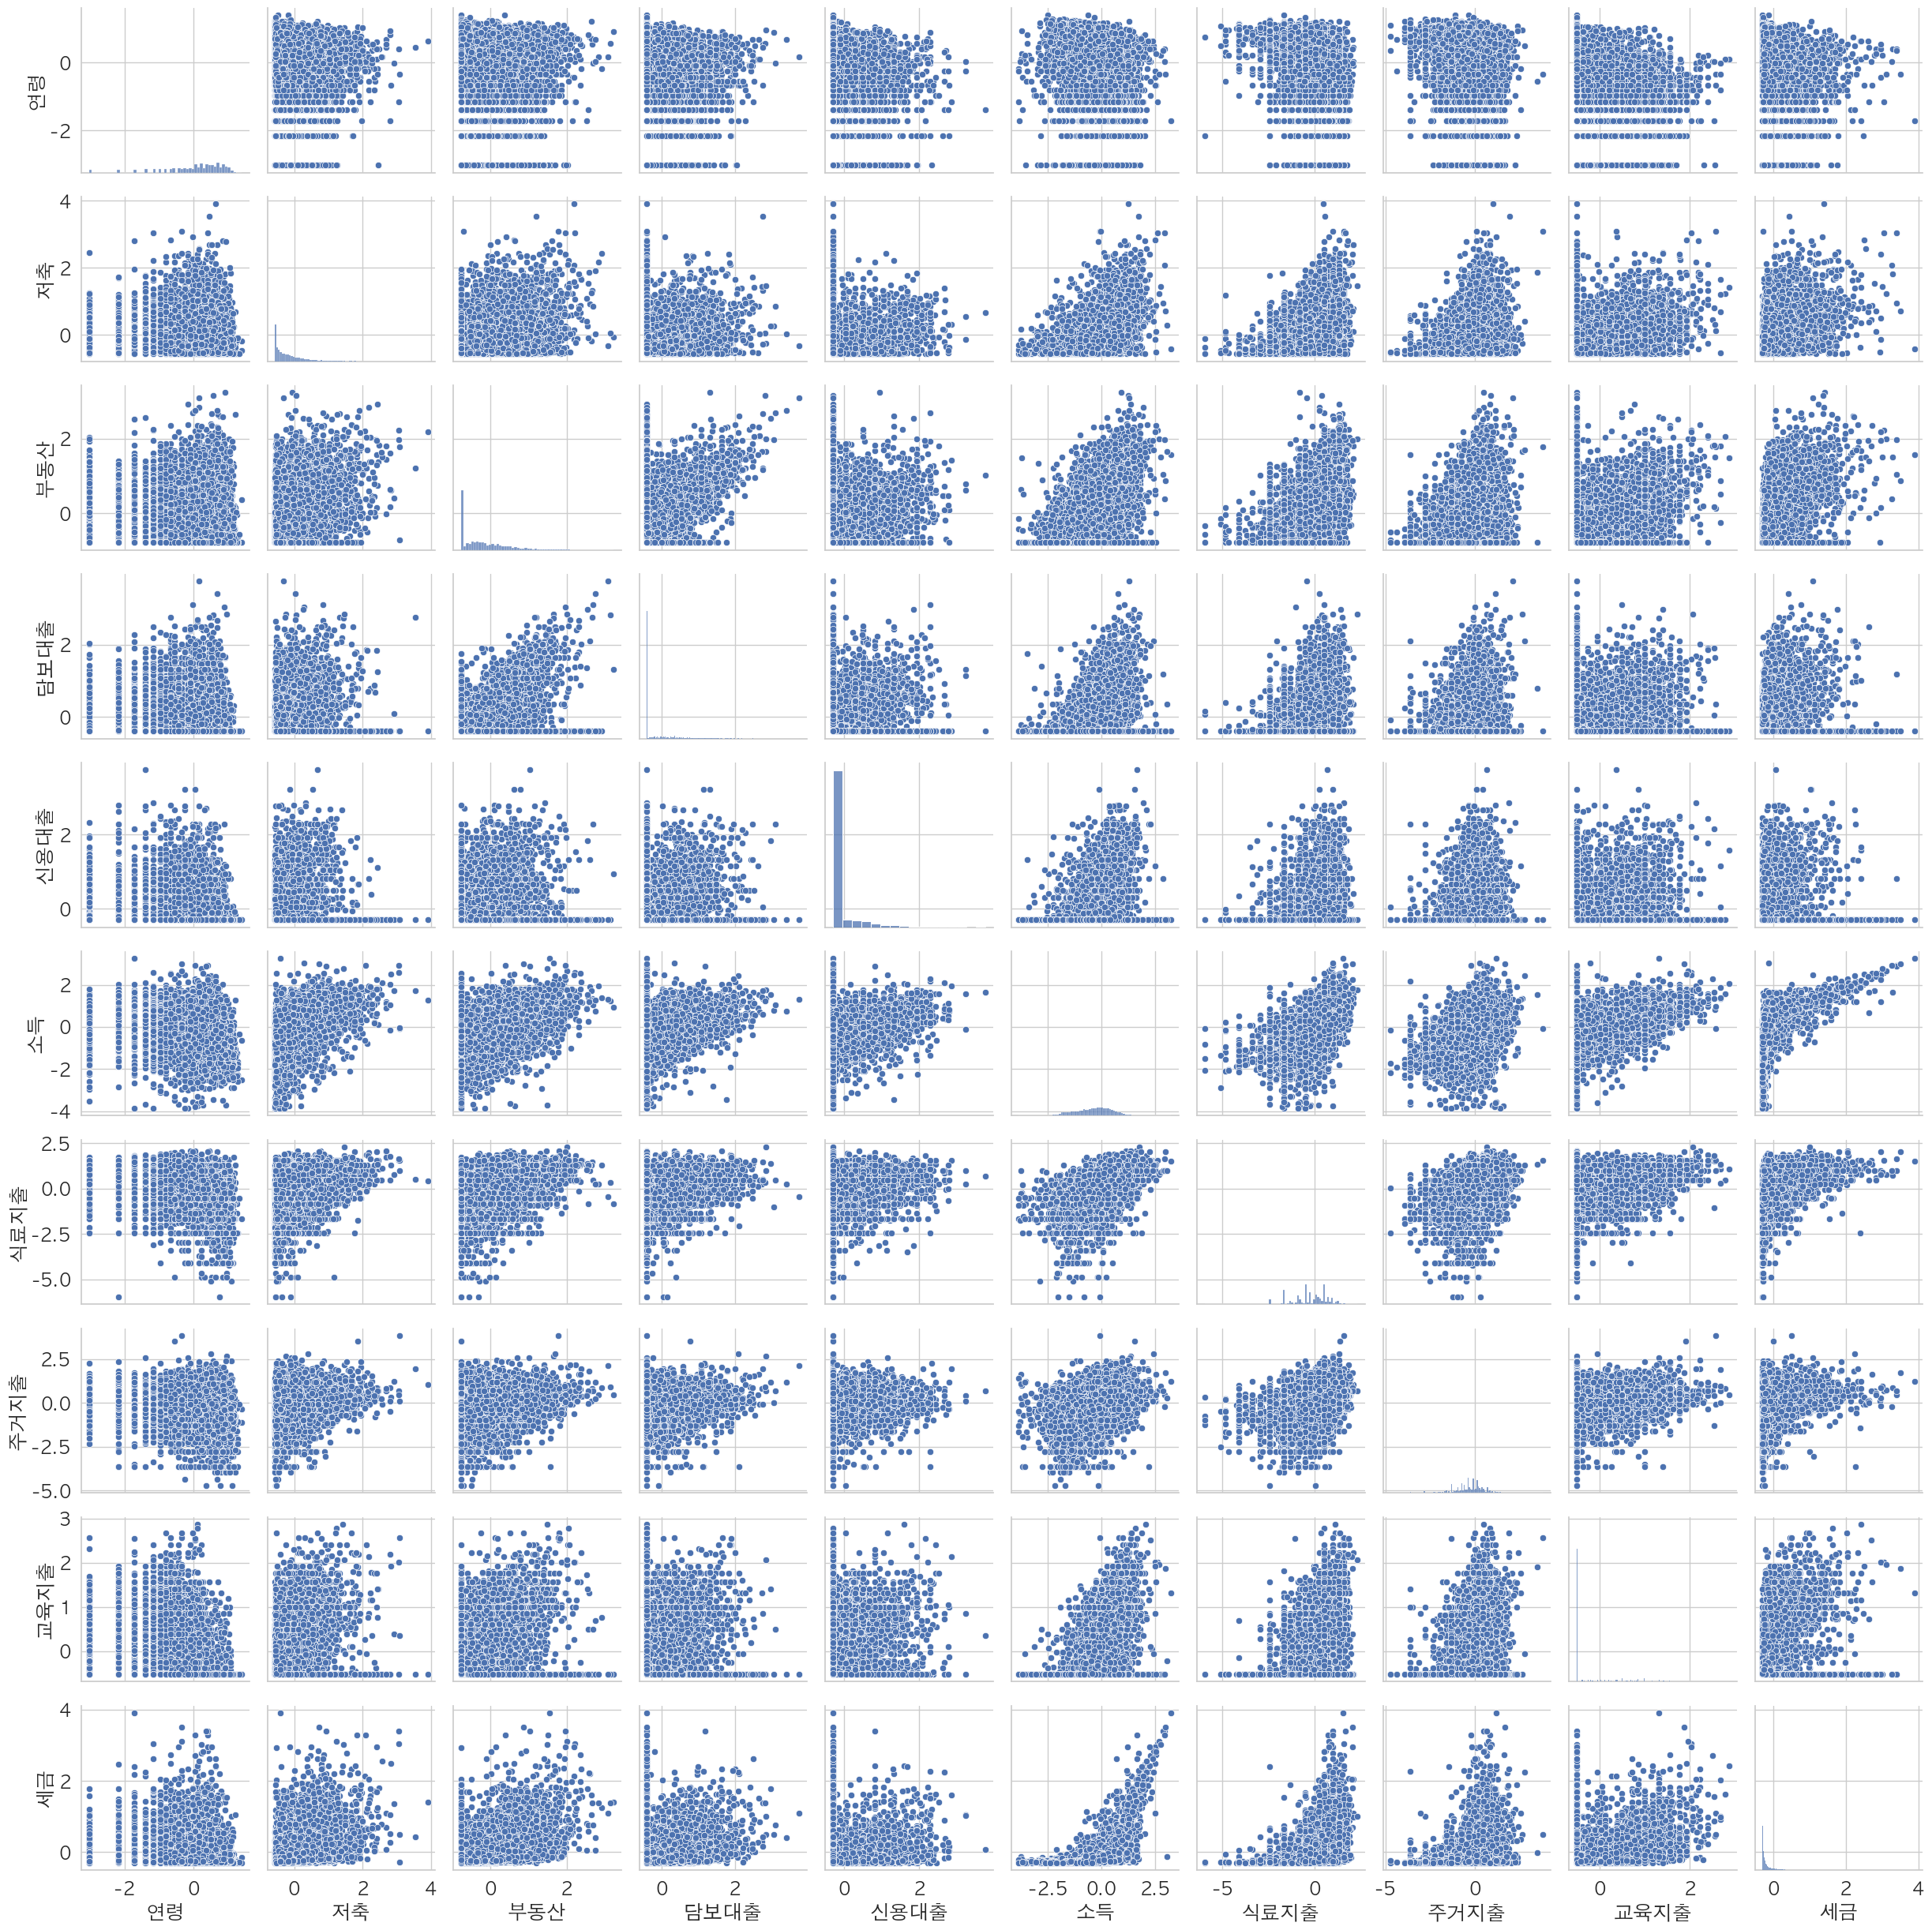

In [22]:
sns.pairplot(data_log[int_columns])
plt.show

In [11]:
model1 = smf.ols('소득 ~ 성별 + 가구원수 + 연령 + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금', data = data).fit()
model2 = smf.ols('소득 ~ 성별 + 가구원수 + 연령 + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금 + 수도권여부', data = data).fit()
model3 = smf.ols('소득 ~ 성별 + 가구원수 + 연령 + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금 + 직업', data = data).fit()
model4 = smf.ols('소득 ~ 성별 + 가구원수 + 연령 + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금 +  C(학력, Treatment(reference=6))', data = data).fit()
model5 = smf.ols('소득 ~ 성별 + 가구원수 + 연령 + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금 + 직업 + 수도권여부 + C(학력, Treatment(reference=6))', data = data).fit()

In [27]:
model5_log= smf.ols('소득 ~ 성별 + 가구원수 + 연령 + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금 + 직업 + 수도권여부 + C(학력, Treatment(reference=6))', data = data_log).fit()

In [28]:
model5_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     소득   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     1229.
Date:                Sat, 16 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:48:35   Log-Likelihood:                -13154.
No. Observations:               17954   AIC:                         2.637e+04
Df Residuals:                   17924   BIC:                         2.660e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -0.0891      0.030     -2.959      0.003      -0.148      -0.030
직업[T.2]                                0.0122      0.031      0.397      0.692      -0.048       0.073
직업[T.3]                                0.0212      0.031      0.686      0.493      -0.039       0.082
직업[T.4]                               -0.1100      0.033     -3.368      0.001      -0.174      -0.046
직업[T.5]                               -0.0812      0.032     -2.505      0.012      -0.145      -0.018
직업[T.6]                               -0.1352      0.033     -4.076      0.000      -0.200      -0.070
직업[T.7]                               -0.0676      0.032     -2.117      0.034      -0.130      -0.005
직업[T.8]                               -0.0071      0.031     -0.227      0.821      -0.069       0.054
직업[T.9]                               -0.2366      0.032     -7.489      0.000      -0.299      -0.175
직업[T.A]                                0.2092      0.109      1.919      0.055      -0.004       0.423
직업[T.기타]                              -0.5381      0.031    -17.481      0.000      -0.598      -0.478
수도권여부[T.G2]                            0.0286      0.008      3.395      0.001       0.012       0.045
C(학력, Treatment(reference=6))[T.1]    -0.4186      0.023    -18.415      0.000      -0.463      -0.374
C(학력, Treatment(reference=6))[T.2]    -0.2728      0.017    -16.399      0.000      -0.305      -0.240
C(학력, Treatment(reference=6))[T.3]    -0.1199      0.016     -7.515      0.000      -0.151      -0.089
C(학력, Treatment(reference=6))[T.4]    -0.0708      0.012     -6.044      0.000      -0.094      -0.048
C(학력, Treatment(reference=6))[T.5]    -0.0583      0.014     -4.175      0.000      -0.086      -0.031
C(학력, Treatment(reference=6))[T.7]     0.0626      0.021      3.040      0.002       0.022       0.103
C(학력, Treatment(reference=6))[T.8]     0.1278      0.034      3.788      0.000       0.062       0.194
성별                                    -0.0662      0.004    -14.758      0.000      -0.075      -0.057
가구원수                                   0.2532      0.005     47.514      0.000       0.243       0.264
연령                                    -0.0001      0.006     -0.021      0.983      -0.011       0.011
저축                                     0.0765      0.004     17.943      0.000       0.068       0.085
부동산                                    0.0843      0.005     16.654      0.000       0.074       0.094
담보대출                                   0.0176      0.004      3.993      0.000       0.009       0.026
신용대출                                   0.0328      0.004      8.462      0.000       0.025       0.040
식료지출                                   0.1628      0.005     30.539      0.000       0.152      

In [13]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     소득   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     4376.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:46:16   Log-Likelihood:                -13196.
No. Observations:               17954   AIC:                         2.642e+04
Df Residuals:                   17941   BIC:                         2.652e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0941      0.014      6.776      0.000       0.067       0.121
수도권여부[T.G2]     0.0323      0.008      3.877      0.000       0.016       0.049
성별             -0.0907      0.009     -9.733      0.000      -0.109      -0.072
가구원수            0.1857      0.005     35.138      0.000       0.175       0.196
연령             -0.0634      0.004    -15.077      0.000      -0.072      -0.055
저축              0.1059      0.004     24.914      0.000       0.098       0.114
부동산             0.0566      0.005     11.325      0.000       0.047       0.066
담보대출            0.0392      0.004      8.928      0.000       0.031       0.048
신용대출            0.0515      0.004     13.290      0.000       0.044       0.059
식료지출            0.1571      0.005     29.984      0.000       0.147       0.167
주거지출            0.0306      0.004      7.612      0.000       0.023       0.038
교육지출            0.0212      0.005      4.571      0.000       0.012       0.030
세금              0.5805      0.004    135.408      0.000       0.572       0.589
==============================================================================
Omnibus:                    15973.515   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17574449.687
Skew:                           3.112   Prob(JB):                         0.00
Kurtosis:                     156.147   Cond. No.                         8.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     소득   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     2635.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:46:16   Log-Likelihood:                -12840.
No. Observations:               17954   AIC:                         2.572e+04
Df Residuals:                   17932   BIC:                         2.589e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3003      0.031      9.812      0.000       0.240       0.360
직업[T.2]       -0.0191      0.030     -0.635      0.526      -0.078       0.040
직업[T.3]       -0.0508      0.030     -1.677      0.094      -0.110       0.009
직업[T.4]       -0.1928      0.032     -6.029      0.000      -0.256      -0.130
직업[T.5]       -0.1567      0.032     -4.932      0.000      -0.219      -0.094
직업[T.6]       -0.2104      0.032     -6.509      0.000      -0.274      -0.147
직업[T.7]       -0.1712      0.031     -5.487      0.000      -0.232      -0.110
직업[T.8]       -0.1246      0.031     -4.070      0.000      -0.185      -0.065
직업[T.9]       -0.2673      0.031     -8.668      0.000      -0.328      -0.207
직업[T.A]        0.0839      0.107      0.784      0.433      -0.126       0.294
직업[T.기타]      -0.3894      0.030    -12.902      0.000      -0.449      -0.330
성별            -0.0739      0.009     -7.802      0.000      -0.093      -0.055
가구원수           0.1796      0.005     34.457      0.000       0.169       0.190
연령             0.0033      0.005      0.663      0.507      -0.006       0.013
저축             0.1045      0.004     25.062      0.000       0.096       0.113
부동산            0.0528      0.005     10.861      0.000       0.043       0.062
담보대출           0.0344      0.004      7.974      0.000       0.026       0.043
신용대출           0.0492      0.004     12.930      0.000       0.042       0.057
식료지출           0.1402      0.005     27.002      0.000       0.130       0.150
주거지출           0.0279      0.004      7.083      0.000       0.020       0.036
교육지출           0.0118      0.005      2.569      0.010       0.003       0.021
세금             0.5715      0.004    134.995      0.000       0.563       0.580
==============================================================================
Omnibus:                    16551.966   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20031650.419
Skew:                           3.309   Prob(JB):                         0.00
Kurtosis:                     166.504   Cond. No.                         55.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     소득   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     2961.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:46:16   Log-Likelihood:                -13096.
No. Observations:               17954   AIC:                         2.623e+04
Df Residuals:                   17935   BIC:                         2.638e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.1565      0.014     10.947      0.000       0.128       0.184
C(학력, Treatment(reference=6))[T.1]    -0.1597      0.022     -7.161      0.000      -0.203      -0.116
C(학력, Treatment(reference=6))[T.2]    -0.1499      0.016     -9.357      0.000      -0.181      -0.119
C(학력, Treatment(reference=6))[T.3]    -0.0993      0.015     -6.485      0.000      -0.129      -0.069
C(학력, Treatment(reference=6))[T.4]    -0.0734      0.011     -6.691      0.000      -0.095      -0.052
C(학력, Treatment(reference=6))[T.5]    -0.0553      0.014     -4.033      0.000      -0.082      -0.028
C(학력, Treatment(reference=6))[T.7]     0.1001      0.020      4.943      0.000       0.060       0.140
C(학력, Treatment(reference=6))[T.8]     0.2319      0.033      7.019      0.000       0.167       0.297
성별                                    -0.0751      0.010     -7.872      0.000      -0.094      -0.056
가구원수                                   0.1895      0.005     35.991      0.000       0.179       0.200
연령                                    -0.0345      0.005     -6.736      0.000      -0.045      -0.024
저축                                     0.1013      0.004     23.897      0.000       0.093       0.110
부동산                                    0.0428      0.005      8.588      0.000       0.033       0.053
담보대출                                   0.0424      0.004      9.700      0.000       0.034       0.051
신용대출                                   0.0500      0.004     12.964      0.000       0.042       0.058
식료지출                                   0.1453      0.005     27.713      0.000       0.135       0.156
주거지출                                   0.0256      0.004      6.383      0.000       0.018       0.033
교육지출                                   0.0152      0.005      3.248      0.001       0.006       0.024
세금                                     0.5775      0.004    134.989      0.000       0.569       0.586
==============================================================================
Omnibus:                    16408.202   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         18834217.991
Skew:                           3.267   Prob(JB):                         0.00
Kurtosis:                     161.537   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     소득   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1928.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:46:16   Log-Likelihood:                -12766.
No. Observations:               17954   AIC:                         2.559e+04
Df Residuals:                   17924   BIC:                         2.583e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.2900      0.031      9.233      0.000       0.228       0.352
직업[T.2]                               -0.0508      0.030     -1.684      0.092      -0.110       0.008
직업[T.3]                               -0.0539      0.030     -1.785      0.074      -0.113       0.005
직업[T.4]                               -0.1809      0.032     -5.659      0.000      -0.244      -0.118
직업[T.5]                               -0.1432      0.032     -4.517      0.000      -0.205      -0.081
직업[T.6]                               -0.1882      0.032     -5.796      0.000      -0.252      -0.125
직업[T.7]                               -0.1475      0.031     -4.720      0.000      -0.209      -0.086
직업[T.8]                               -0.1013      0.031     -3.296      0.001      -0.162      -0.041
직업[T.9]                               -0.2429      0.031     -7.857      0.000      -0.303      -0.182
직업[T.A]                                0.0764      0.107      0.716      0.474      -0.133       0.285
직업[T.기타]                              -0.3750      0.030    -12.449      0.000      -0.434      -0.316
수도권여부[T.G2]                            0.0301      0.008      3.654      0.000       0.014       0.046
C(학력, Treatment(reference=6))[T.1]    -0.1295      0.022     -5.823      0.000      -0.173      -0.086
C(학력, Treatment(reference=6))[T.2]    -0.1246      0.016     -7.656      0.000      -0.157      -0.093
C(학력, Treatment(reference=6))[T.3]    -0.0759      0.016     -4.857      0.000      -0.106      -0.045
C(학력, Treatment(reference=6))[T.4]    -0.0526      0.011     -4.590      0.000      -0.075      -0.030
C(학력, Treatment(reference=6))[T.5]    -0.0438      0.014     -3.205      0.001      -0.071      -0.017
C(학력, Treatment(reference=6))[T.7]     0.0905      0.020      4.495      0.000       0.051       0.130
C(학력, Treatment(reference=6))[T.8]     0.1953      0.033      5.916      0.000       0.131       0.260
성별                                    -0.0539      0.010     -5.515      0.000      -0.073      -0.035
가구원수                                   0.1791      0.005     34.352      0.000       0.169       0.189
연령                                     0.0195      0.006      3.499      0.000       0.009       0.030
저축                                     0.1000      0.004     23.964      0.000       0.092       0.108
부동산                                    0.0477      0.005      9.618      0.000       0.038       0.057
담보대출                                   0.0360      0.004      8.366      0.000       0.028       0.044
신용대출                                   0.0483      0.004     12.728      0.000       0.041       0.056
식료지출                                   0.1357      0.005     25.997      0.000       0.125      

In [17]:
data['직업'].value_counts()

기타    4723
9     2129
2     2022
3     1842
8     1834
7     1446
6     1263
4     1194
5     1159
1      319
A       23
Name: 직업, dtype: int64

<Axes: >

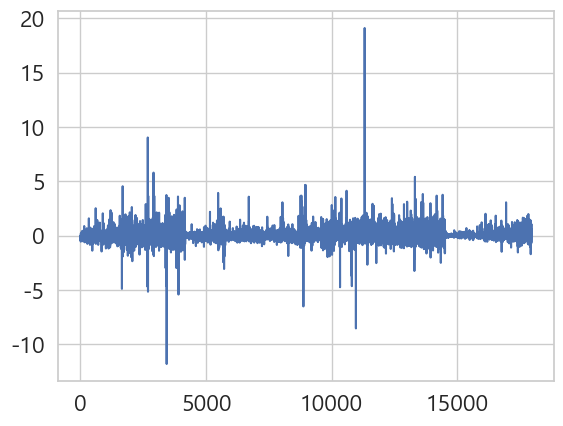

In [18]:
model1.resid.plot(label = "full model")


In [19]:

import patsy
y, X = patsy.dmatrices('소득 ~ 성별 + 가구원수 + 연령 + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금', data, return_type='matrix')
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 11.00045946512048
VIF of 성별 : 1.2304350818535463
VIF of 가구원수 : 1.9600694014304607
VIF of 연령 : 1.23553513066889
VIF of 저축 : 1.2688584038447
VIF of 부동산 : 1.7210745987642784
VIF of 담보대출 : 1.3565938351833289
VIF of 신용대출 : 1.0586885174629068
VIF of 식료지출 : 1.918951252793749
VIF of 주거지출 : 1.1347397094096088
VIF of 교육지출 : 1.5124169592613572
VIF of 세금 : 1.2949132855170988


In [20]:
import patsy
y, X = patsy.dmatrices('소득 ~ 성별 + 가구원수+ 연령  + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금 + 직업 + 수도권여부 + 학력', data, return_type='matrix')
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 106.38370971892455
VIF of 직업[T.2] : 6.7080838399420575
VIF of 직업[T.3] : 6.201924108007746
VIF of 직업[T.4] : 4.68387449561261
VIF of 직업[T.5] : 4.482022966332495
VIF of 직업[T.6] : 5.092073469327978
VIF of 직업[T.7] : 5.344201670612256
VIF of 직업[T.8] : 6.39936925061862
VIF of 직업[T.9] : 7.375867277489636
VIF of 직업[T.A] : 1.0750654729051394
VIF of 직업[T.기타] : 12.988670848172275
VIF of 수도권여부[T.G2] : 1.0915565167414567
VIF of 학력[T.2] : 3.323440498000516
VIF of 학력[T.3] : 3.225086870370964
VIF of 학력[T.4] : 6.403677786459706
VIF of 학력[T.5] : 4.04300626793429
VIF of 학력[T.6] : 6.487458550945966
VIF of 학력[T.7] : 2.311125655897614
VIF of 학력[T.8] : 1.5393276397240727
VIF of 성별 : 1.4226738111024482
VIF of 가구원수 : 2.0074871693896843
VIF of 연령 : 2.2853614227559276
VIF of 저축 : 1.2863636333241788
VIF of 부동산 : 1.8127390548689686
VIF of 담보대출 : 1.368808022047345
VIF of 신용대출 : 1.0646442444379187
VIF of 식료지출 : 2.0104282178943316
VIF of 주거지출 : 1.1504568866777367
VIF of 교육지출 : 1.5662135195840594
VIF

In [21]:
import patsy
y, X = patsy.dmatrices('소득 ~ 성별 + 가구원수+ 연령  + 저축 + 부동산 + 담보대출 + 신용대출 + 식료지출 + 주거지출 + 교육지출 + 세금 + 직업 + 수도권여부 + 학력', data_log, return_type='matrix')
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i, x in enumerate(X.design_info.column_names):
    print( 'VIF of', x, ':', variance_inflation_factor(X, i))

VIF of Intercept : 823.6811916451386
VIF of 직업[T.2] : 6.667943594281151
VIF of 직업[T.3] : 6.142940892287636
VIF of 직업[T.4] : 4.647798868536572
VIF of 직업[T.5] : 4.44117739553286
VIF of 직업[T.6] : 5.085549920582383
VIF of 직업[T.7] : 5.264994396723146
VIF of 직업[T.8] : 6.301388429735358
VIF of 직업[T.9] : 7.340438794271148
VIF of 직업[T.A] : 1.0745853467602704
VIF of 직업[T.기타] : 12.991771351094274
VIF of 수도권여부[T.G2] : 1.0838451008017729
VIF of 학력[T.2] : 3.3373807384493337
VIF of 학력[T.3] : 3.256515810277855
VIF of 학력[T.4] : 6.449356491522434
VIF of 학력[T.5] : 4.069226999262479
VIF of 학력[T.6] : 6.596185076336734
VIF of 학력[T.7] : 2.336934487802115
VIF of 학력[T.8] : 1.5356089253584169
VIF of 성별 : 1.4943538722658198
VIF of 가구원수 : 2.8167788289006146
VIF of 연령 : 2.243326287624911
VIF of 저축 : 1.7977957194552008
VIF of 부동산 : 1.93346177805765
VIF of 담보대출 : 1.3077497162744751
VIF of 신용대출 : 1.1316768923251024
VIF of 식료지출 : 2.33852679387679
VIF of 주거지출 : 1.3009465769958692
VIF of 교육지출 : 2.149888872554054
VIF of 